<a href="https://colab.research.google.com/github/ishalijadhav/bank-load-modelling/blob/master/bank_loan_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:**
***Marketing Campaign for Banking Products***

**Objective:**
To predict the likelihood of a liability customer buying personal
loans.

**Data source:**  https://www.kaggle.com/itsmesunil/bank-loan-modelling/download


#### **1. Importing the libraries required for EDA**

In [124]:
import numpy as np                      #linear algebra
import pandas as pd                     #data processing
import matplotlib.pyplot as plt         #visualisation library
import seaborn as sns                   #visualisation library
%matplotlib inline

#### **2. Loading the datasets into Colab**

In [125]:
url = 'https://raw.githubusercontent.com/ishalijadhav/bank-load-modelling/master/data/Bank_Personal_Loan_Modelling.csv'

bank = pd.read_csv(url)

In [126]:
#top 5 records of the dataframe
bank.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### **3. Checking the data summary getting to know the data (datatypes, statistics, null values etc.)**

In [127]:
#datatype and missing value check
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


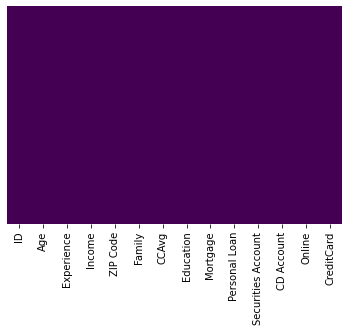

In [128]:
#to confirm null values presence
sns.heatmap(bank.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**There are 14 features in total with no null values**



In [129]:
#there are 5000 records each having 14 features 
bank.shape

(5000, 14)

In [130]:
#statistical summary for all features
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Note:** Experience column has some negative values which can be determined from the min value -3.0.

In [131]:
bank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### **4. Cleaning the data (dropping irrelevant columns, deleting negative values etc.)**

The ID column here is irrelavant as it doesn't provide any insight on the Personal Loan column. Also, Zip Code can be termed nominal for this dataset having many different values. Therefore they can be dropped.

In [132]:
bank.drop(['ID','ZIP Code'],axis=1,inplace=True)
bank.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


Since *Experience* has negative values and it is also highly correlated with *Age* (not required for a Linear Regression Model) we will drop the Experience column. 

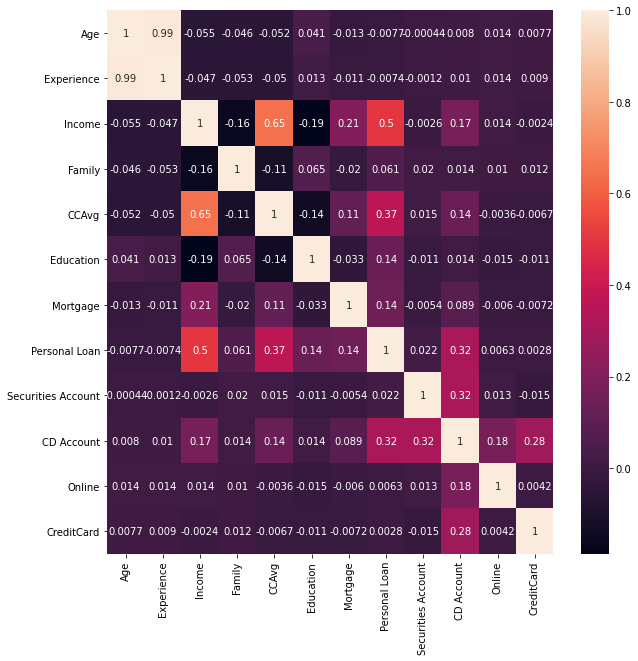

In [133]:
plt.subplots(figsize=(10,10))
sns.heatmap(bank.corr(),annot=True)

From the Heatmap we can make out that:
* *Income* is **moderately** correlated with both *CCAvg*(0.65) and *Personal Loan*(0.5).
* *Age* and *Experience* are **highly** correlated(0.99).

Hence, we will drop the Experience column to avoid multicollinearity, because it also has negative values as seen before in the statistical description of the dataset.


In [134]:
bank.drop(['Experience'],axis=1,inplace=True)
bank.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


#### **5. Exploratory Data Analysis(EDA)**

In [135]:
bank.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**Observations:** 
* There are five binary variables(ones having only two possible categories) out of which *'Personal Loan'* is our target variable.
* Age, Income will be classified as interval variables.
* Education and Family will classified as categorical variables.

In [136]:
#No. of customers with zero Mortgage value.
bank[bank['Mortgage'] == 0].shape[0]

3462

In [137]:
#No. of people with zero credit card spending per month
bank[bank['CCAvg'] == 0].shape[0]

106

**Value Counts for categorical variables**

In [138]:
categorical = ['Education','Family','Securities Account','Online','CreditCard','CD Account']
for feature in categorical: 
  print(bank[feature].value_counts(),'\n')

1    2096
3    1501
2    1403
Name: Education, dtype: int64 

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64 

0    4478
1     522
Name: Securities Account, dtype: int64 

1    2984
0    2016
Name: Online, dtype: int64 

0    3530
1    1470
Name: CreditCard, dtype: int64 

0    4698
1     302
Name: CD Account, dtype: int64 



**Observations:**
*   Most of the people who have credit cards, do use it often.
*   Most of the customers belong to the Level 1 Education category i.e. Undergrad. 
*   Maximum of the customers own neither a CD Account nor a Securities Account.
*   About 7% customers don't use their credit cards often.





**Univariate Analysis**

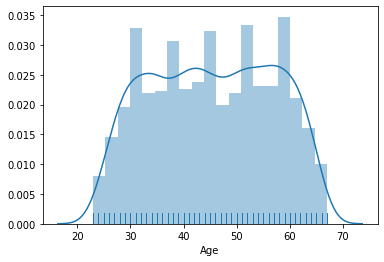

In [139]:
sns.distplot(bank['Age'],rug=True)

**Observations:**
*   Majority of the customers belong to the age group ranging from 30-60 years.
*   The variable is normally distributed.
*   This can also be verified from the describe table, where both mean and median tend to be equal i.e. about 45.





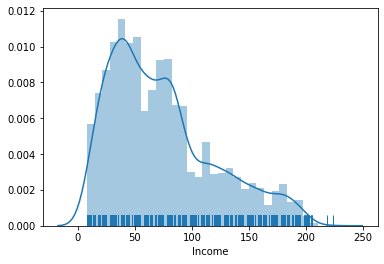

In [140]:
sns.distplot(bank['Income'],rug=True)

**Observations:**
*   Most of the customers have an income between 45-55K.
*   From the describe table, we can see that mean > median.
*   Hence, distribution is positively skewed.







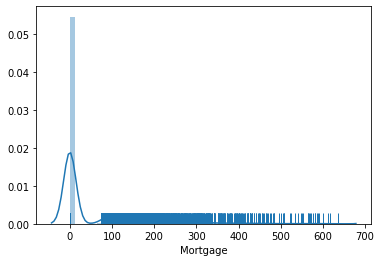

In [141]:
sns.distplot(bank['Mortgage'],rug=True)

**Observations:**
*   More than 80% customers have a Mortgage value less than 400K.
*   Moreover, about 70% people have a zero Mortgage value(as seen from a statement above).



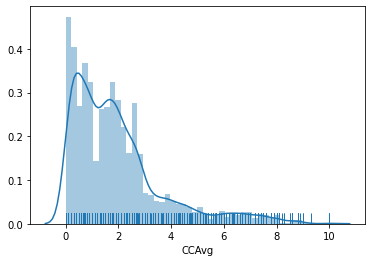

In [142]:
sns.distplot(bank['CCAvg'],rug=True)

**Observations:**
*   Majority of the customers spend about 0-2.5K on credit cards per month.
*   The distribution positively skewed, which can be confirmed by seeing that the mean is slightly greater than the median.





**Categorical Plots**

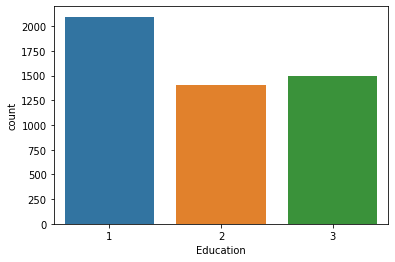

In [143]:
sns.countplot(bank['Education'])

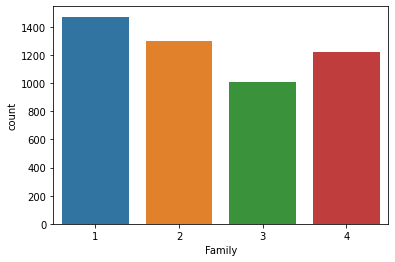

In [144]:
sns.countplot(bank['Family'])

**Bivariate/Multivariate Analysis**

In [145]:
bank.head(2)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0


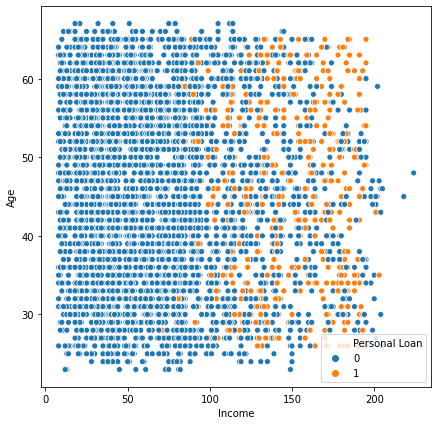

In [146]:
plt.subplots(figsize=(7,7))
sns.scatterplot(bank['Income'],bank['Age'],hue=bank['Personal Loan'])

**Observation:** People having income more than 100K are most likely to have a Personal Loan. Age does not affect much.




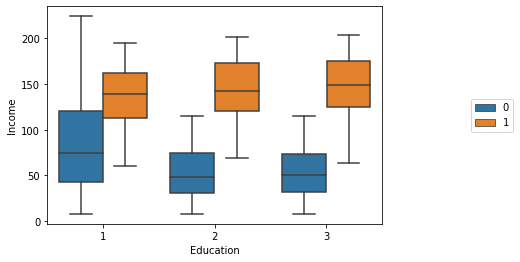

In [147]:
g = sns.boxplot(bank['Education'],bank['Income'],hue=bank['Personal Loan'])
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

**Observations:** 
*   People with Education Level 1 have higher income.
*   However, people across all Educational levels having almost similar Income have Personal Loans.



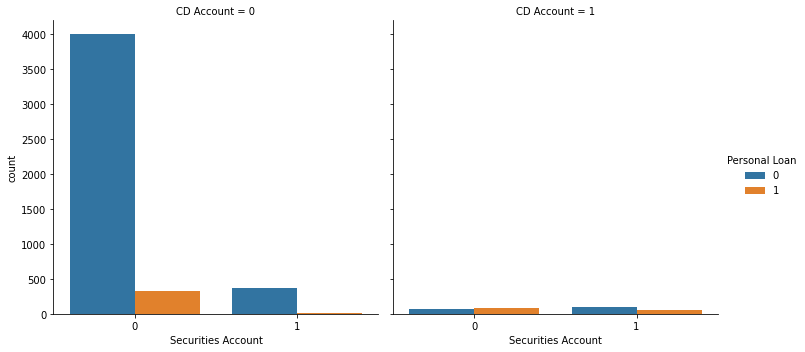

In [148]:
sns.catplot(x='Securities Account',hue='Personal Loan',col='CD Account',data=bank,kind='count')

**Observations:**
*   Most of the customers who have a Securities Account, have neither a CD Account nor a Loan.
*   Many customers who have a loan don't have a Securities Account.



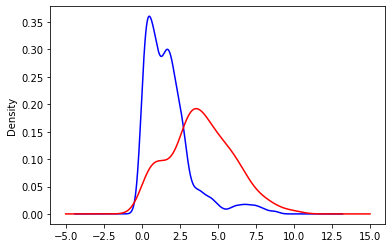

In [149]:
bank[bank['Personal Loan'] == 0 ]['CCAvg'].plot.kde(color='b')
bank[bank['Personal Loan'] == 1 ]['CCAvg'].plot.kde(color='r')

**Observations:**
*   Customers who don't have a loan have a lower Credit Card spending than the ones who have a loan.
*   Therefore, the ones with more Credit Card Average will be more likely to buy a loan.





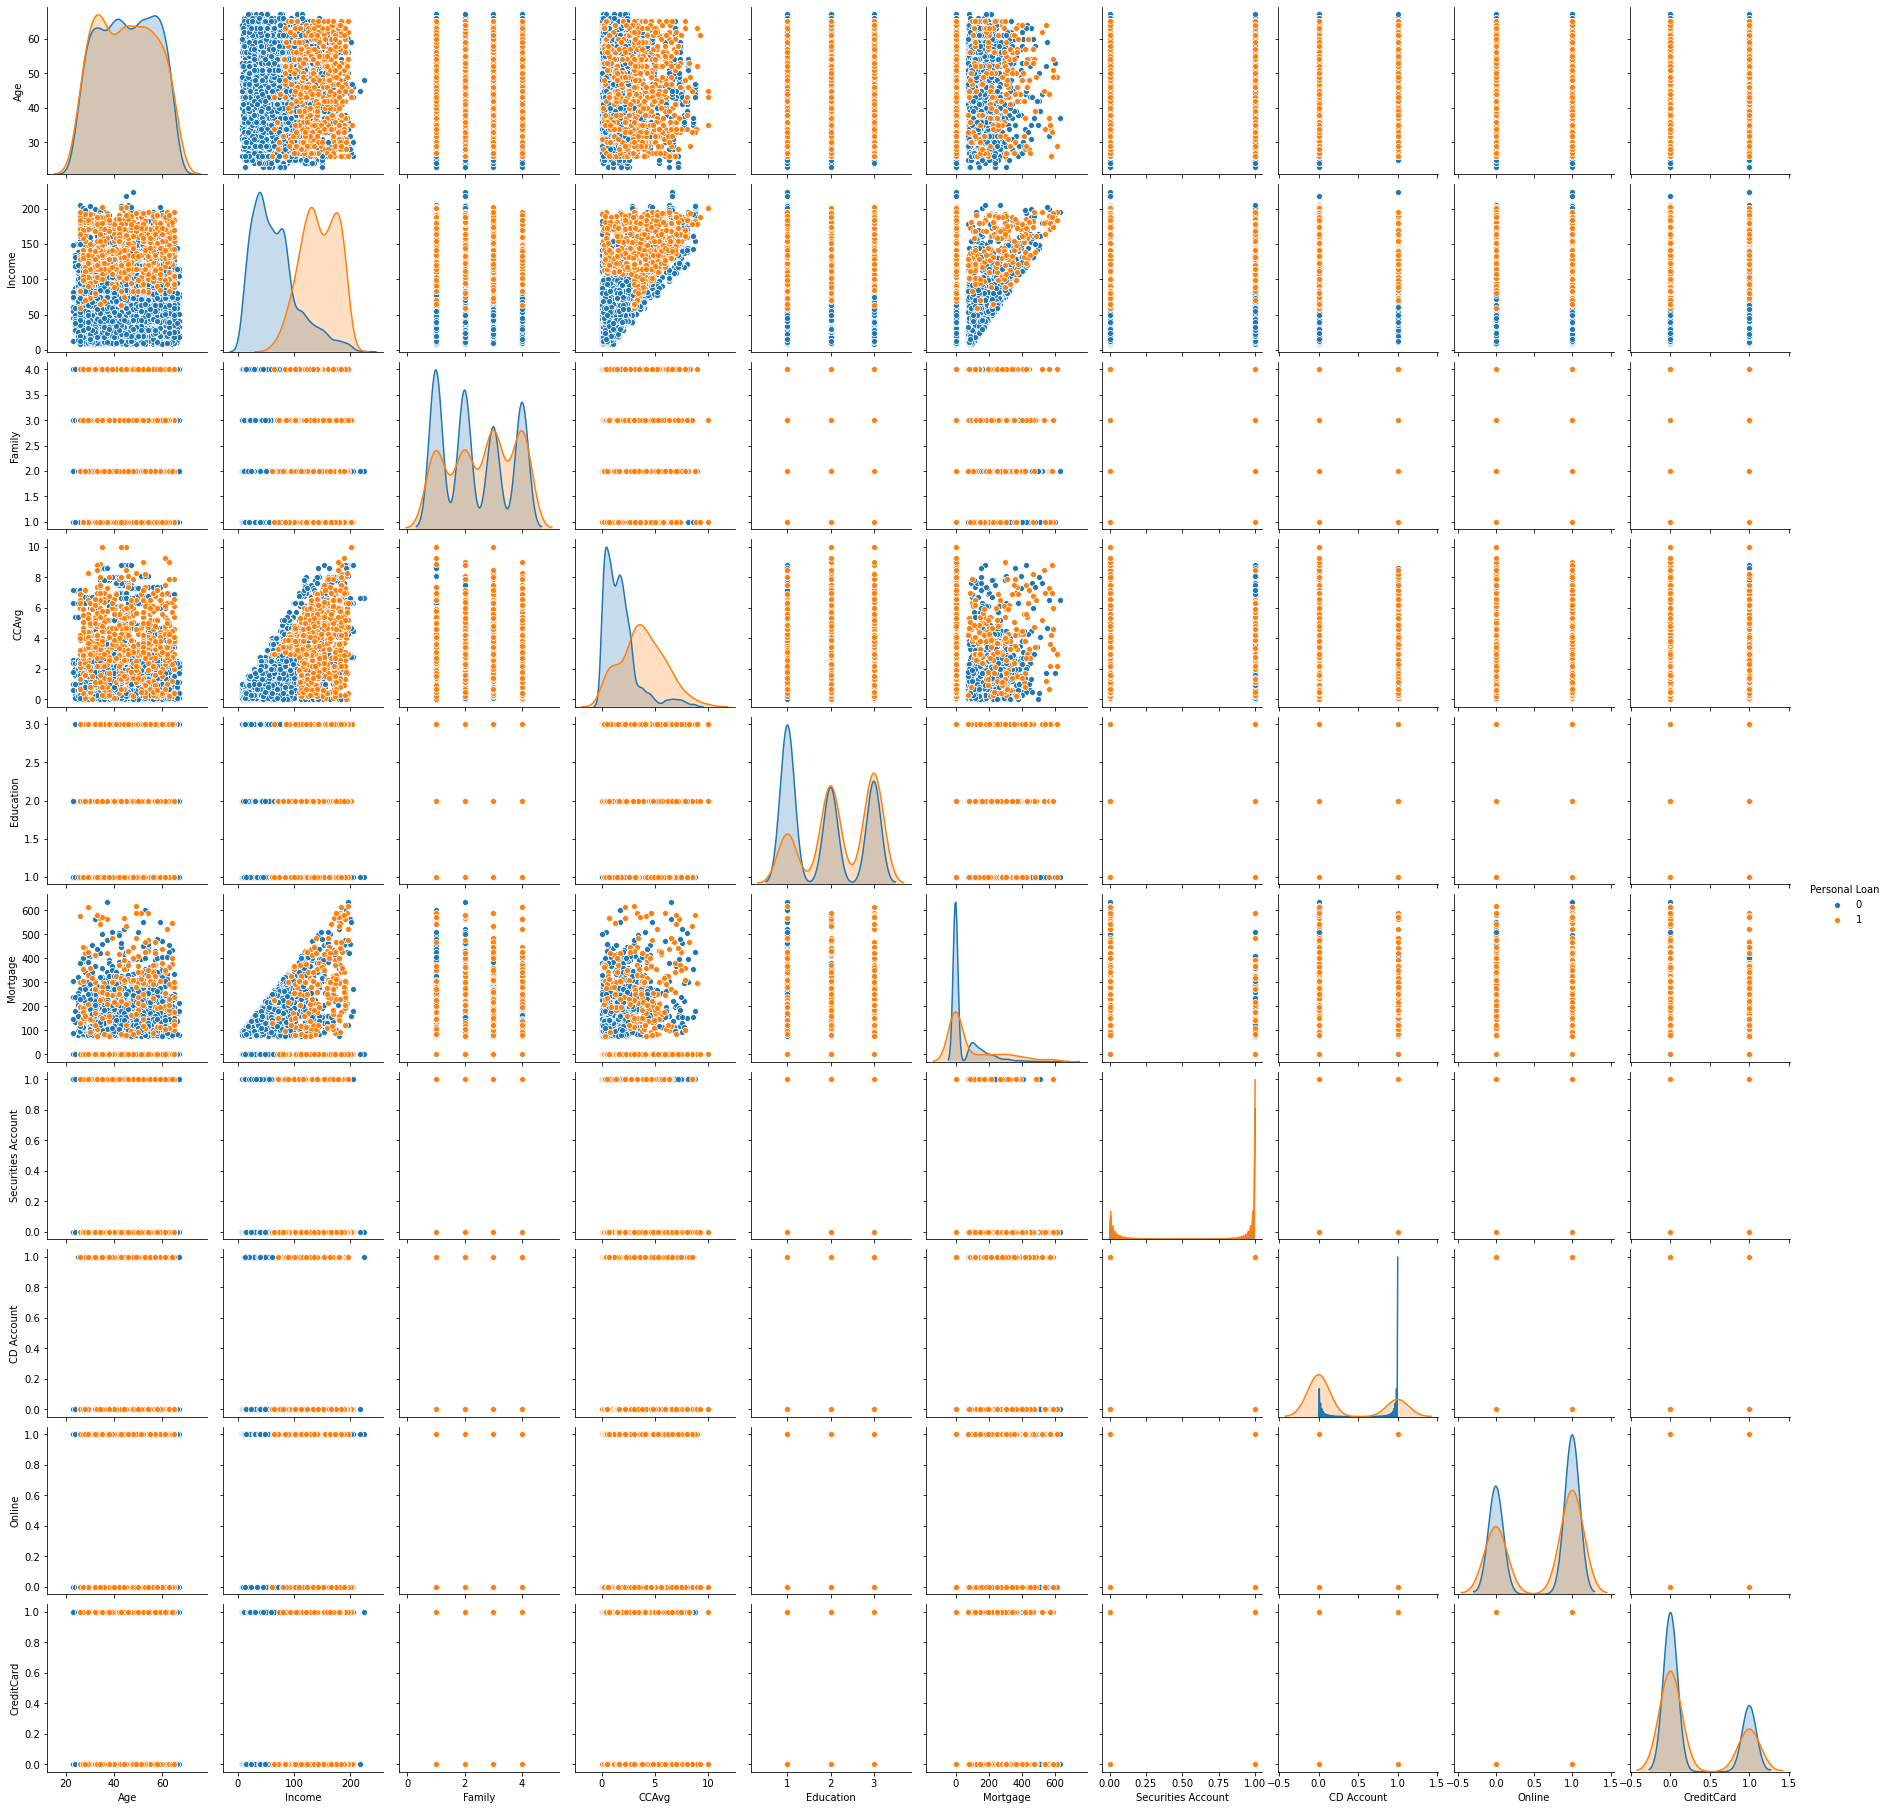

In [150]:
sns.pairplot(bank,hue='Personal Loan')

#### **6. Applying transformations on feature variables**

In [151]:
data_X = bank.drop('Personal Loan',axis=1)
target_Y = bank['Personal Loan']

In [152]:
from sklearn.preprocessing import PowerTransformer

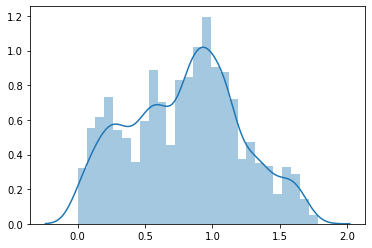

In [153]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
graph = pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(graph)

In [154]:
data_X['Mortgage_Trans'] = pd.cut(data_X['Mortgage'],bins=[0,100,200,300,400,500,600,700],
                                  labels=[0,1,2,3,4,5,6],include_lowest=True)
data_X.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Mortgage_Trans
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0


In [155]:
data_X.drop('Mortgage',axis=1,inplace=True)

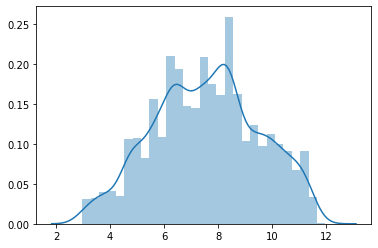

In [156]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
graph = pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(graph)

Hence all the feature variables are obtained as normal distributions.

#### **7. Normalising and splitting the data**

In [157]:
from sklearn.preprocessing import MinMaxScaler

In [158]:
scaler = MinMaxScaler()
scaler.fit(data_X,target_Y)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [159]:
scaler.transform(data_X)

array([[0.04545455, 0.18981481, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.12037037, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.36363636, 0.01388889, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90909091, 0.07407407, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.95454545, 0.18981481, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [0.11363636, 0.34722222, 0.66666667, ..., 1.        , 1.        ,
        0.        ]])

In [160]:
#splitting data using stratified sampling
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(data_X, target_Y, test_size=0.3, stratify=target_Y, random_state=0)

#### **8. LogisticRegression Model**

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
#Scaling the data as per the warning
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)

In [165]:
#Applying scaling to test data
X_test_minmax = scaler.transform(X_test)

In [166]:
#testing the model again
logmodel = LogisticRegression()
logmodel.fit(X_train_minmax,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
#getting predications of data
predictions = logmodel.predict(X_test_minmax)

In [200]:
#importing metrics
from sklearn.metrics import confusion_matrix,classification_report

Confusion Matrix


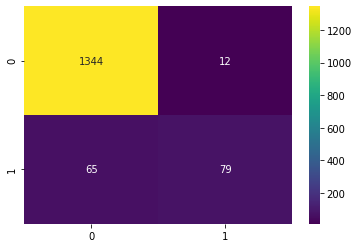

In [168]:
print('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='viridis',fmt='d')

In [169]:
lg_train_score = logmodel.score(X_train_minmax,y_train)
lg_test_score = logmodel.score(X_test_minmax,y_test)
print('Accuracy for LogisticRegression on training set: {:.2f}'.format(lg_train_score))
print('Accuracy for LogisticRegression on test set: {:.2f}'.format(lg_test_score))

Accuracy for LogisticRegression on training set: 0.95
Accuracy for LogisticRegression on test set: 0.95


In [203]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           1       0.87      0.55      0.67       144

    accuracy                           0.95      1500
   macro avg       0.91      0.77      0.82      1500
weighted avg       0.95      0.95      0.94      1500



#### **9. Building various other models for performance comparison**

**DecisionTreeClassifier Model** 

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [204]:
predictions = dtree.predict(X_test)

Confusion Matrix


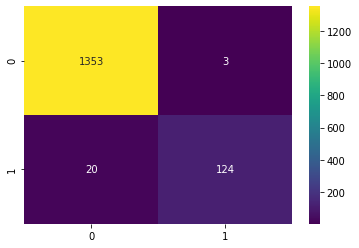

In [197]:
print('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='viridis',fmt='d')

In [198]:
dtree_train_score = dtree.score(X_train,y_train)
dtree_test_score = dtree.score(X_test,y_test)
print('Accuracy for DecisionTreeClassifier on training set: {:.2f}'.format(dtree_train_score))
print('Accuracy for DecisionTreeClassifier on test set: {:.2f}'.format(dtree_test_score))

Accuracy for DecisionTreeClassifier on training set: 0.98
Accuracy for DecisionTreeClassifier on test set: 0.98


In [205]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.86      0.92       144

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



**Support Vector Classifier Model**

In [176]:
from sklearn.svm import SVC

In [177]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [206]:
predictions = svc_model.predict(X_test)

Confusion Matrix


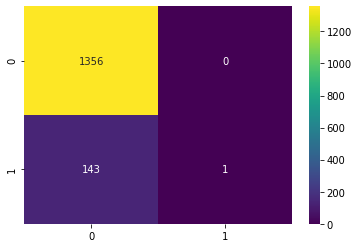

In [179]:
print('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='viridis',fmt='d')

In [180]:
svc_train_score = svc_model.score(X_train,y_train)
svc_test_score = svc_model.score(X_test,y_test)
print('Accuracy for SupportVectorClassifier on training set: {:.2f}'.format(svc_train_score))
print('Accuracy for SupportVectorClassifier on test set: {:.2f}'.format(svc_test_score))

Accuracy for SupportVectorClassifier on training set: 0.90
Accuracy for SupportVectorClassifier on test set: 0.90


In [207]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1356
           1       1.00      0.01      0.01       144

    accuracy                           0.90      1500
   macro avg       0.95      0.50      0.48      1500
weighted avg       0.91      0.90      0.86      1500



**Naive Bayes Model**

In [181]:
from sklearn.naive_bayes import GaussianNB

In [208]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

predictions = naive_model.predict(X_test)

Confusion Matrix


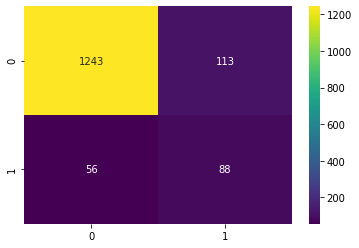

In [183]:
print('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='viridis',fmt='d')

In [184]:
naive_train_score = naive_model.score(X_train,y_train)
naive_test_score = naive_model.score(X_test,y_test)
print('Accuracy for NaiveBayes on training set: {:.2f}'.format(naive_train_score))
print('Accuracy for NaiveBayes on test set: {:.2f}'.format(naive_test_score))

Accuracy for NaiveBayes on training set: 0.88
Accuracy for NaiveBayes on test set: 0.89


In [209]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.44      0.61      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



#### **10. Model Comparison**

**Conclusion:**

  The objective of the bank is the conversion of their liability customers into loan customers. Thus, they want us to  build a model that will help them identify the potential customers who will buy a loan. 
  Total four classification algorithms were used in this analysis. From the above analysis, it seems like **DecisionTree** algorithm has the highest accuracy. Also, as seen from the Confusion Matrix, the amount of Type I and Type II errors are less for this particular algorithm as compared to the others. The results provided by the Classification Report are also upto the mark for labelling it as the best fit model for our analysis.